In [6]:
#Read wide table from one drive
widecsv=read.csv("Fig. 2H FI.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%17 >= 7 & i%%17 < 12){
    tallcsv[i,3] <- "Two"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%17 >= 12 | i%%17 == 0){
    tallcsv[i,3] <- "Three"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"Fig. 2H FI_tall.csv", row.names = FALSE)



        VALUE       Treatment Trial
1    6066.173        X01_DMSO   One
2    5310.741        X01_DMSO   One
3    2241.716        X01_DMSO   One
4    3601.112        X01_DMSO   One
5          NA        X01_DMSO   One
6          NA        X01_DMSO   One
7   43064.470        X01_DMSO   Two
8    7990.909        X01_DMSO   Two
9  104951.100        X01_DMSO   Two
10  20070.910        X01_DMSO   Two
11         NA        X01_DMSO   Two
12   8936.598        X01_DMSO Three
13 201486.800        X01_DMSO Three
14   9799.687        X01_DMSO Three
15 204832.000        X01_DMSO Three
16         NA        X01_DMSO Three
17         NA        X01_DMSO Three
18   2658.140  X02_flg20_1_nM   One
19   3410.845  X02_flg20_1_nM   One
20   7389.692  X02_flg20_1_nM   One
21   3250.963  X02_flg20_1_nM   One
22         NA  X02_flg20_1_nM   One
23         NA  X02_flg20_1_nM   One
24    148.878  X02_flg20_1_nM   Two
25  22880.840  X02_flg20_1_nM   Two
26   9066.228  X02_flg20_1_nM   Two
27         NA  X02_flg20_1_n

In [7]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [8]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("Fig. 2H FI_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))

print(head(VALUEdata))

  Treatment     VALUE Trial
1  X01_DMSO  6066.173   One
2  X01_DMSO  5310.741   One
3  X01_DMSO  2241.716   One
4  X01_DMSO  3601.112   One
5  X01_DMSO 43064.470   Two
6  X01_DMSO  7990.909   Two


[1] 17 23

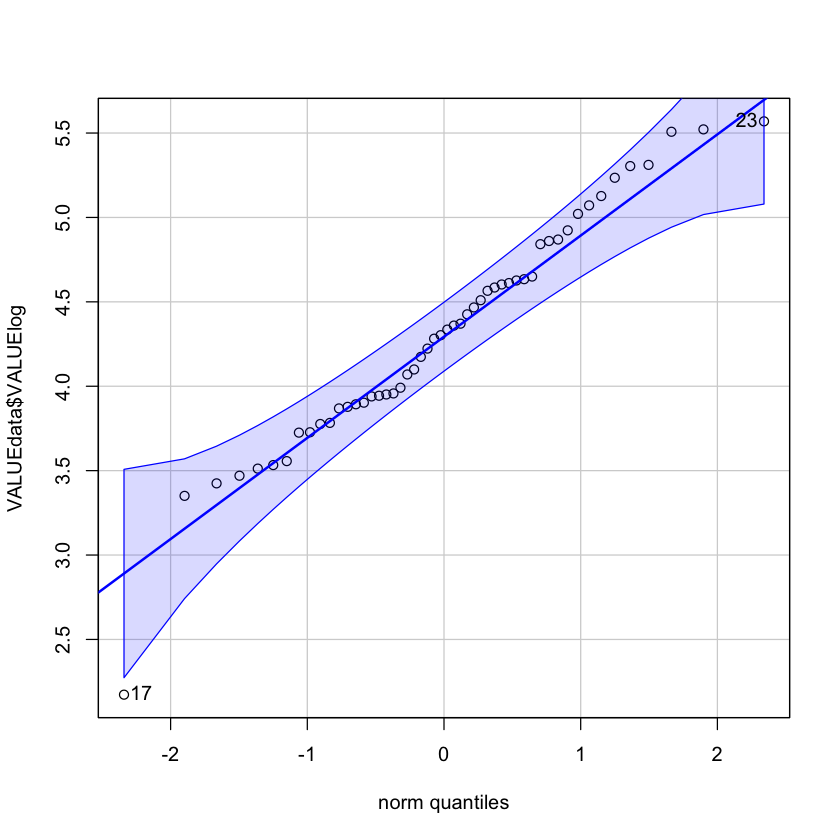

In [9]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


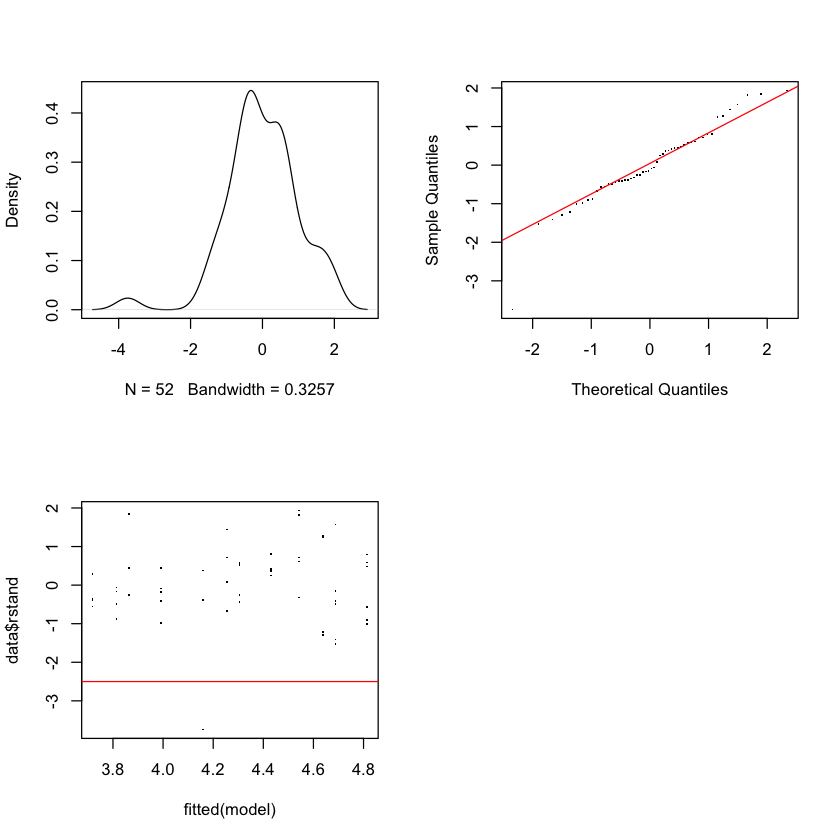

In [10]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [11]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
   101.8    113.5    -44.9     89.8       46 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6856 -0.4807 -0.1228  0.5707  1.9046 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.1283   0.3582  
 Residual             0.2906   0.5391  
Number of obs: 52, groups:  Trial, 3

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)               4.23612    0.25884  5.74005  16.366 4.91e-06 ***
TreatmentX02_flg20_1_nM  -0.09569    0.22055 49.08675  -0.434    0.666    
TreatmentX03_Maya2_10_uM  0.17625    0.20910 49.07139   0.843    0.403    
TreatmentX04_flg22_1_nM   0.04985    0.21671 49.13204   0.230    0.819    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correla

In [12]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq          Mean Sq           NumDF       DenDF          F value      
 Min.   :0.5198   Min.   :0.1733   Min.   :3   Min.   :49.09   Min.   :0.5962  
 1st Qu.:0.5198   1st Qu.:0.1733   1st Qu.:3   1st Qu.:49.09   1st Qu.:0.5962  
 Median :0.5198   Median :0.1733   Median :3   Median :49.09   Median :0.5962  
 Mean   :0.5198   Mean   :0.1733   Mean   :3   Mean   :49.09   Mean   :0.5962  
 3rd Qu.:0.5198   3rd Qu.:0.1733   3rd Qu.:3   3rd Qu.:49.09   3rd Qu.:0.5962  
 Max.   :0.5198   Max.   :0.1733   Max.   :3   Max.   :49.09   Max.   :0.5962  
     Pr(>F)      
 Min.   :0.6205  
 1st Qu.:0.6205  
 Median :0.6205  
 Mean   :0.6205  
 3rd Qu.:0.6205  
 Max.   :0.6205  
       X01_DMSO  X02_flg20_1_nM X03_Maya2_10_uM  X04_flg22_1_nM 
            "a"             "a"             "a"             "a" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUElog ~ Treatment + (1 | Trial), data = VALUEdata, 
    REM